#Drona AG - Image processing tests

### Purpose and scope of Colab: To test different OpenCV based imageprocessing solutions
In our Omdena Drone AG assigment do we want to explor if image processing can be used to evaluate the quality of the un-supervised segementation models so that we can decide wich model gives the best performance (IoU).

The purpose of this Colab is to test some OpenCV based image processing algoritms as an input for further work to image processing algoritms can be of use as "ground truth" for the un-supervised segementation models.  




###Some OpenCV Image processing algoritms tested on our set


1.   Simpel binary thresholding
2.   Post i listan




In [28]:
#imports
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

##Exctract data


In [ ]:
#Extract the images by mouting the directory to content driv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Set access to choosen image directory
IMAGE_DIR = './drive/MyDrive/Omdena_DroneAG/Data/Barley/'
input_images = os.listdir(IMAGE_DIR)
print(input_images)

['scout_point_image_20210512T132633000Z.jpe', 'scout_point_image_20201016T141744000Z.jpe', 'scout_point_image_20210527T145118000Z.jpe', 'scout_point_image_20210512T132702000Z.jpe', 'scout_point_image_20200930T103736000Z.jpe', 'scout_point_image_20210303T154952000Z.jpe', 'scout_point_image_20200807T124452000Z.jpe', 'scout_point_image_20200520T132826000Z.jpe', 'scout_point_image_20201016T141607000Z.jpe', 'scout_point_image_20210331T114335000Z.jpe', 'scout_point_image_20210428T110738000Z.jpe', 'scout_point_image_20210527T144719000Z.jpe', 'scout_point_image_20201016T141807000Z.jpe', 'scout_point_image_20220430T093447000Z.jpe', 'scout_point_image_20210119T084008000Z.jpe', 'scout_point_image_20210407T090453000Z.jpe', 'scout_point_image_20210307T171056000Z.jpe', 'scout_point_image_20210309T124908000Z.jpe', 'scout_point_image_20201110T152138000Z.jpe', 'scout_point_image_20201128T134442000Z.jpe', 'scout_point_image_20210601T160010000Z.jpe', 'scout_point_image_20210413T121156000Z.jpe', 'scout_po

##Preparation approaches
Approach: To filter out the green parts of an image i.e. the vegetation.



In [ ]:
#Case one i.e. on an image with all channels
def green_split(image):
    input_image_name = input_images[0]
    input_image = os.path.join(IMAGE_DIR,input_image_name )
    img_color = cv2.imread(input_image, 1)
    b,g,r = cv2.split(img_color)
    img_green = cv2.merge([g,g,g])
    return img_color, img_green

In [ ]:
#Display images - orignal and green channel
plt.rcParams["figure.figsize"] = (200, 30)
input_image = input_images[0]
img_color, img_green = green_split(input_image)

 # display results
plt.subplot(211), plt.imshow(img_color)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(img_green)
plt.title('Image green color channel'), plt.xticks([]), plt.yticks([])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

##Simpel binary thresholding
The simple binary thresholding algoritm tested on two input images types:

*   On "all color image"
*   On the filtrated green channel of the image
*   Process as combination of the two


In [ ]:
def simple_threshold(input_image, bw_image, threshold):
    ret, thres = cv2.threshold(bw_image, threshold, 255, cv2.THRESH_BINARY)
    # display results
    plt.subplot(311), plt.imshow(input_image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(312), plt.imshow(bw_image, cmap ='gray' )
    plt.title('Greyscale image'), plt.xticks([]), plt.yticks([])
    plt.subplot(313), plt.imshow(thres, cmap ='gray')
    plt.title('Simple Threshold Image'), plt.xticks([]), plt.yticks([])
    plt.show()

Full color input image

In [ ]:
#Threshold choosen "at random", input image with all color channels
input_image_name = input_images[0]
input_image = os.path.join(IMAGE_DIR,input_image_name )
img_color = cv2.imread(input_image, 1)
img_bw = cv2.imread(input_image, 0)
threshold = 150
simple_threshold(img_color,img_bw, threshold)

Output hidden; open in https://colab.research.google.com to view.

Threshold on the green channel of an image.
<br> The idea is that the extraction would be better on the green colors i.e. vegetation. 

In [ ]:
input_image_name = input_images[0]
input_image = os.path.join(IMAGE_DIR,input_image_name )
image = cv2.imread(input_image, 1)
img_color, img_green = green_split(image)
#img_green_ch_bw = cv2.cvtColor(img_green, cv2.COLOR_BGR2GRAY)
img_green_ch_bw,_ ,_ = cv2.split(img_green)
threshold = 150
simple_threshold(img_green[:,:],img_green_ch_bw, threshold)

Output hidden; open in https://colab.research.google.com to view.

Conclusion so far: Simple theshold is to dependent on lightning, even on the green channel, however not sure implementation of green channel is correct and thresholds could maybe be better set. To be investigated.

###Adatptive thresholding
Mitigates lightning effects on the image.

In [ ]:
#Adaptive thresholding 
def adaptive_threshold(input_image, bw_image,neighborhood):
    Thres_adapt = cv2.adaptiveThreshold(bw_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, neighborhood, 2)
    # display results
    plt.subplot(311), plt.imshow(input_image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(312), plt.imshow(bw_image, cmap= 'gray')
    plt.title('Greyscale image'),  plt.xticks([]), plt.yticks([])
    plt.subplot(313), plt.imshow(Thres_adapt, cmap= 'gray')
    plt.title('Adaptive thresholding'),  plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
#Perform adaptive gaussian thresholding
input_image_name = input_images[0]
input_image = os.path.join(IMAGE_DIR,input_image_name )
img_color = cv2.imread(input_image, 1)
img_bw = cv2.imread(input_image, 0)
neighborhood = 115
adaptive_threshold(img_color,img_bw, neighborhood)

Output hidden; open in https://colab.research.google.com to view.

Adaptive gaussian thresholding on green channel - pending task

## Color segmentation 
This approach to use thresholding with colorsegmentation, here "greenish" HSV upper and lower limints.

In [13]:
# Extract selected image
input_image_name = input_images[0]
input_image = os.path.join(IMAGE_DIR,input_image_name )

The HSV lower and upper limits ranges here estimated using the " HSV color thresholder script" presented at [Stackoverflow: Choosing the correct upper and lower HSV boundaries for color detection with`cv::inRange` (OpenCV)](https://https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv).

Example of selection from a barley image: (image to be uploaded)



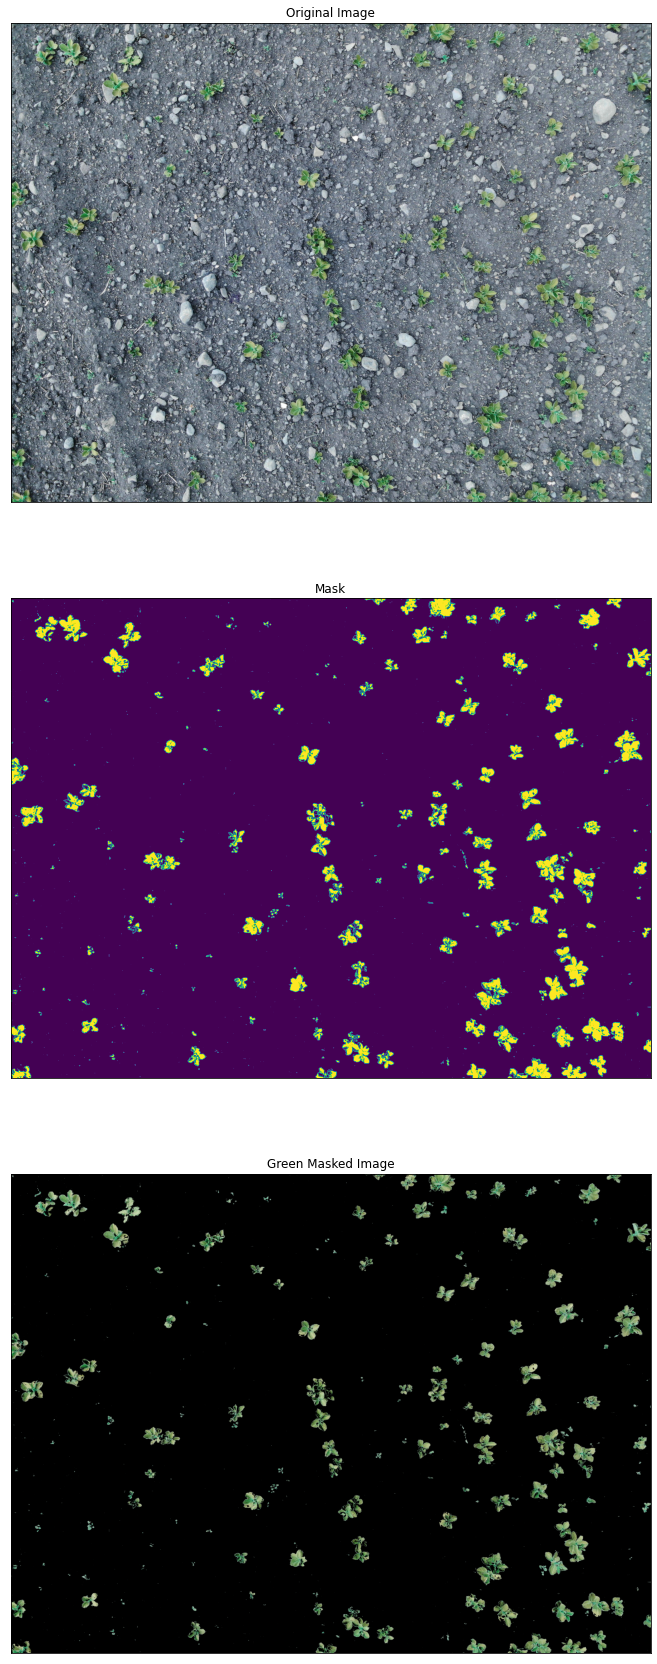

In [19]:
#Perform color segmentation within upper and lower limits.

img = cv2.imread(input_image)

# Set limits 
GREEN_MIN = np.array([39, 26, 105],np.uint8)
GREEN_MAX = np.array([88, 237, 223],np.uint8)

#Transform image to hsv format
hsv_seg_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_seg_img, GREEN_MIN, GREEN_MAX)
green_masked_img = cv2.bitwise_and(img, img, mask = mask)

# display results
plt.subplot(311), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(mask)
plt.title('Mask'),  plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(green_masked_img)
plt.title('Green Masked Image'),  plt.xticks([]), plt.yticks([])
plt.show()

## Contours
The approach is to use contourse on the color segemented image above.
Note: Ensure that you have run the color segementation above, since the green segemented image will have been used.

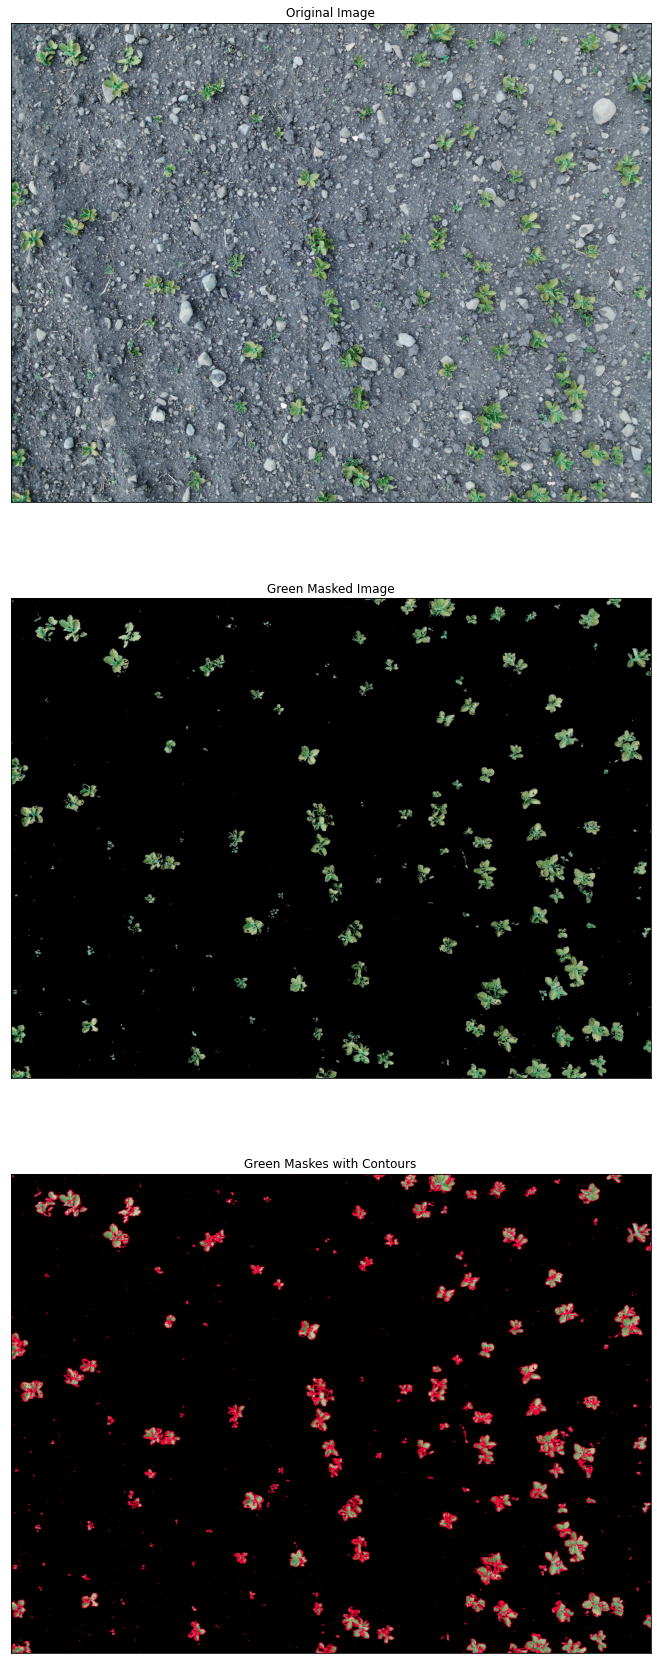

In [34]:
#Find countours in image
masked_img_gray = cv2.cvtColor(green_masked_img, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(masked_img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
green_cont_img = green_masked_img.copy()
index = -1
thickness = 2
color = (255,0,55)
cv2.drawContours(green_cont_img, contours, index, color, thickness)

# display results
plt.subplot(311), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(green_masked_img)
plt.title('Green Masked Image'),  plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(green_cont_img)
plt.title('Green Maskes with Contours'),  plt.xticks([]), plt.yticks([])
plt.show()

## Edge detection in OpenCV and skimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Set access to choosen image directory
import os
IMAGE_DIR = './drive/MyDrive/Omdena_DroneAG/Data/Barley/'
input_images = os.listdir(IMAGE_DIR)
print(input_images)

['scout_point_image_20210512T132633000Z.jpe', 'scout_point_image_20201016T141744000Z.jpe', 'scout_point_image_20210527T145118000Z.jpe', 'scout_point_image_20210512T132702000Z.jpe', 'scout_point_image_20200930T103736000Z.jpe', 'scout_point_image_20210303T154952000Z.jpe', 'scout_point_image_20200807T124452000Z.jpe', 'scout_point_image_20200520T132826000Z.jpe', 'scout_point_image_20201016T141607000Z.jpe', 'scout_point_image_20210331T114335000Z.jpe', 'scout_point_image_20210428T110738000Z.jpe', 'scout_point_image_20210527T144719000Z.jpe', 'scout_point_image_20201016T141807000Z.jpe', 'scout_point_image_20220430T093447000Z.jpe', 'scout_point_image_20210119T084008000Z.jpe', 'scout_point_image_20210407T090453000Z.jpe', 'scout_point_image_20210307T171056000Z.jpe', 'scout_point_image_20210309T124908000Z.jpe', 'scout_point_image_20201110T152138000Z.jpe', 'scout_point_image_20201128T134442000Z.jpe', 'scout_point_image_20210601T160010000Z.jpe', 'scout_point_image_20210413T121156000Z.jpe', 'scout_po

### Edge detection in OpenCV

In [ ]:

plt.rcParams["figure.figsize"] = (200, 30)
# read image
input_image_name = input_images[0]
input_image = os.path.join(IMAGE_DIR,input_image_name )
img_org = cv2.imread(input_image)
img = cv2.imread( input_image, 0)
# Find edge with Canny edge detection
edges = cv2.Canny(img, 100, 200)

# display results
plt.subplot(311), plt.imshow(img_org)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img, cmap ='gray')
plt.title('Orginal Image Gray')
plt.subplot(313), plt.imshow(edges, cmap='gray')
plt.title('Edge Detection on Gray Image'), plt.xticks([]), plt.yticks([])

plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Edge detection open CV with adaptive thresholding

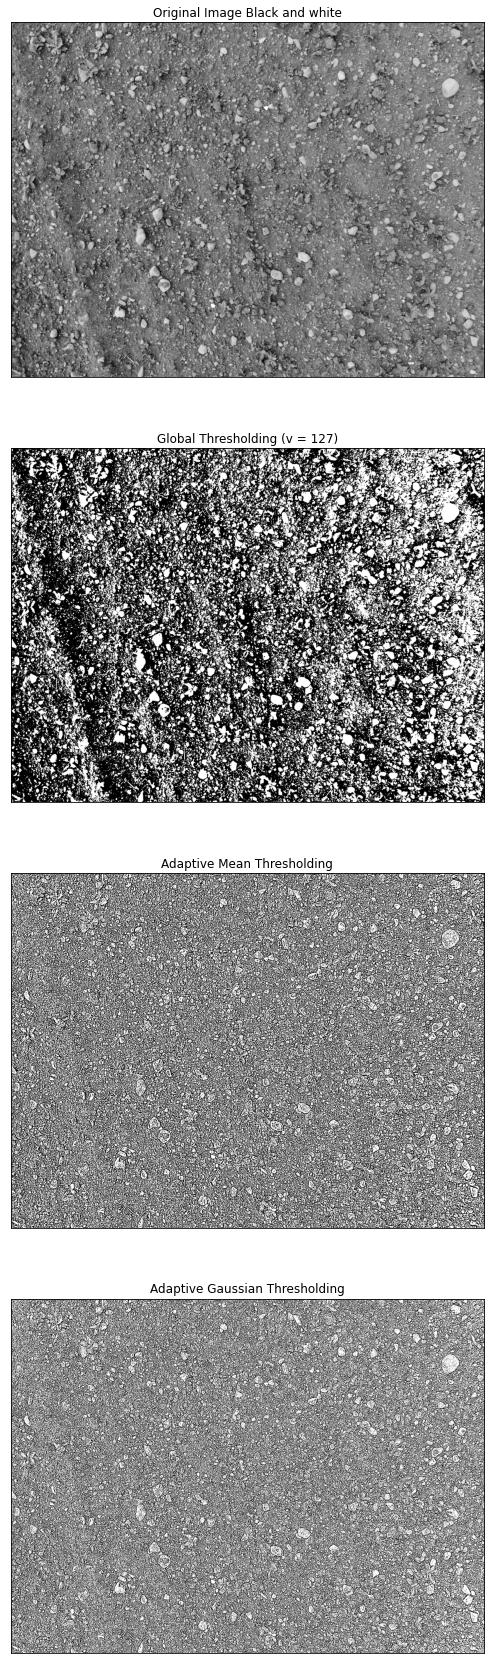

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(input_image,0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image Black and white', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(len(images)):
    plt.subplot(len(images),1,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Edge detection in skimage

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.feature import canny

import matplotlib.pyplot as plt

# read image
img_color = imread(input_image, as_gray=False)
img = imread(input_image, as_gray= True)

# find edge with Canny edge detection
edges = canny(img)

# display results
plt.rcParams["figure.figsize"] = (200, 30)
plt.subplot(311), plt.imshow(img_color)
plt.title('Original Image Color'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img, cmap='gray')
plt.title('Original Image Grey'), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Output hidden; open in https://colab.research.google.com to view.